# Import

In [1]:
# package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence

import tensorflow as tf
tf.random.set_seed(1111)
tf.keras.utils.set_random_seed(1111)

# dataset packagea
from tensorflow.keras.datasets import imdb

# metrcis
from sklearn.metrics import accuracy_score, classification_report

# ETC
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# SimpleRNN-Model

In [2]:
def loss_compare(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()
    print("="*30)
    print("Training loss: ", history.history['loss'][-1])
    print("Validation loss: ", history.history['val_loss'][-1])
    print("="*30)


def Simple_RNN(config, X, y):
    model = Sequential()
    model.add(SimpleRNN(config.rnn_node1, return_sequences=True, input_shape=(1, X.shape[2])))
    model.add(Dropout(config.drop_out_rate))
    model.add(Dropout(config.drop_out_rate))
    model.add(SimpleRNN(config.rnn_node2, return_sequences=False))
    model.add(Dropout(config.drop_out_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    optimizer = RMSprop(learning_rate=config.learning_rate)
    model.compile(optimizer=optimizer, 
                    loss='binary_crossentropy')
    
    early_stopping = EarlyStopping(
        monitor='val_loss',    
        patience=config.patience,           
        verbose=0,             
        restore_best_weights=True 
    )
    
    history = model.fit(X, y, 
                        epochs=config.epochs, 
                        batch_size=config.batch_size,
                        validation_split=config.validation_split, 
                        callbacks=[early_stopping])

    loss_compare(history)
    return model


# Hyperparameter config

In [3]:
class config():
    def __init__(self, rnn_node1, rnn_node2, drop_out_rate=0.5, learning_rate=0.001, patience_ratio=0.2, epochs=100, 
                 validation_split=0.2, batch_size = 128):
        self.rnn_node1 = rnn_node1
        self.rnn_node2 =rnn_node2
        self.drop_out_rate =drop_out_rate
        self.learning_rate = learning_rate
        self.patience = epochs * patience_ratio
        self.batch_size = batch_size
        self.epochs = epochs
        self.validation_split = validation_split

        self.info = {"rnn_node1": rnn_node1,
                     "rnn_node2": rnn_node2,
                     "drop_out_rate": drop_out_rate,
                     "learning_rate": learning_rate,
                     "patience": self.patience,
                     "epochs": epochs,
                     "batch_size": batch_size,
                     "validation_split": validation_split,
                     }

    def get_hyperparameter(self):
        for k, v in self.info.items():
            print(f"{k}: {v}")

# Dataset

In [ ]:
max_len = 200

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
y_train = np.array(y_train)

X_test = sequence.pad_sequences(X_test, maxlen=max_len)
y_test = np.array(y_test)

In [5]:
X_train.shape

(25000, 200)

# Model

In [6]:
rnn_config = config(rnn_node1=256,
                    rnn_node2=128,
                    drop_out_rate=0.5,
                    learning_rate=0.001,
                    patience_ratio=0.2,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2)

c:\Users\Xenrose\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 256)         │       116,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,401 (650.00 KB)

 Trainable params: 166,401 (650.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8491 - val_loss: 0.7014
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 0.7079 - val_loss: 0.6980
Epoch 3/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 0.6977 - val_loss: 0.6960
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - loss: 0.6961 - val_loss: 0.6957
Epoch 5/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 0.6962 - val_loss: 0.6962
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - loss: 0.6959 - val_loss: 0.6985
Epoch 7/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.6965 - val_loss: 0.6998
Epoch 8/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.6964 - val_loss: 0.6992
Epoch 9/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.6950 - val_loss: 0.6973
Epoch 10/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 0.6968 - val_loss: 0.7005
Epoch 11/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.6955 - val_loss: 0.6984
Epoch 12/200
625/625 

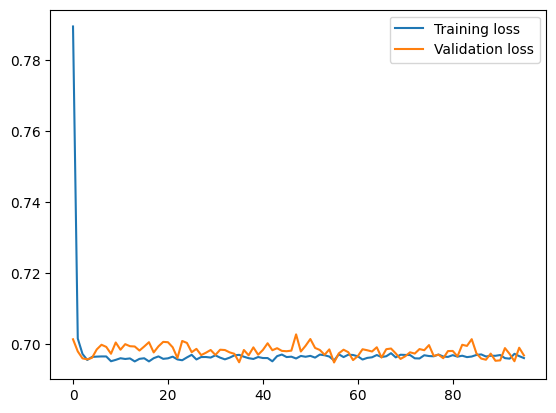

Training loss:  0.696079432964325
Validation loss:  0.6968342065811157


In [7]:
# .reshape(-1, 1, X_train.shape[1])
rnn = Simple_RNN(rnn_config, X_train.reshape(-1, 1, max_len), y_train)

In [8]:
pred = rnn.predict(X_test.reshape(-1, 1, X_test.shape[1]))

pred = (pred > 0.5).astype(np.int8).reshape(-1,)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step


In [9]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [10]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Evaluation

In [11]:
accuracy_score(y_test, pred)

0.5

In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.16      0.25     12500
           1       0.50      0.84      0.63     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.44     25000
weighted avg       0.50      0.50      0.44     25000

